=== Résultats ===
Somme xi = 2232
Somme yi = 4116
Somme xi^2 = 487750
Somme xi*yi = 900961
Somme yi^2 = 1666782

Coefficient directeur (alpha) = 1.887
Ordonnée à l'origine (beta) = -8.779
Équation de la droite : y = 1.887x + -8.779

Prédiction pour x = 500 : y = 934.90 secondes


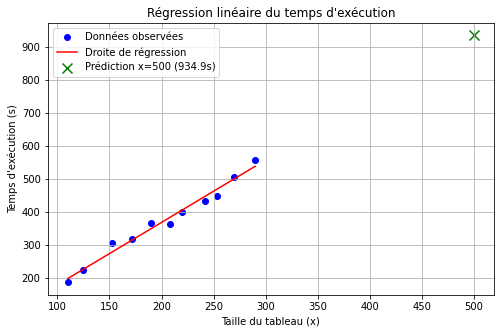

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# === 1. Données ===
x = np.array([110, 125, 152, 172, 190, 208, 220, 242, 253, 270, 290])
y = np.array([187, 225, 305, 318, 367, 365, 400, 435, 450, 506, 558])
n = len(x)

# === 2. Calculs statistiques ===
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x**2)
sum_xy = np.sum(x*y)
sum_y2 = np.sum(y**2)

# Moyennes
x_bar = np.mean(x)
y_bar = np.mean(y)

# === 3. Coefficients de régression ===
alpha = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
beta = y_bar - alpha * x_bar

print("=== Résultats ===")
print(f"Somme xi = {sum_x}")
print(f"Somme yi = {sum_y}")
print(f"Somme xi^2 = {sum_x2}")
print(f"Somme xi*yi = {sum_xy}")
print(f"Somme yi^2 = {sum_y2}")
print()
print(f"Coefficient directeur (alpha) = {alpha:.3f}")
print(f"Ordonnée à l'origine (beta) = {beta:.3f}")
print(f"Équation de la droite : y = {alpha:.3f}x + {beta:.3f}")

# === 4. Prédiction pour x = 500 ===
x_pred = 500
y_pred = alpha * x_pred + beta
print()
print(f"Prédiction pour x = {x_pred} : y = {y_pred:.2f} secondes")

# === 5. Tracé graphique ===
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Données observées')
plt.plot(x, alpha * x + beta, color='red', label='Droite de régression')

# Ajout du point prédit
plt.scatter(x_pred, y_pred, color='green', marker='x', s=100, label=f'Prédiction x=500 ({y_pred:.1f}s)')

plt.title("Régression linéaire du temps d'exécution")
plt.xlabel("Taille du tableau (x)")
plt.ylabel("Temps d'exécution (s)")
plt.legend()
plt.grid(True)
plt.show()


### 1 : Prédictions du modèle pour tout l’ensemble X

Pour chaque i, la prédiction est $\hat y_i=\langle w,x_i\rangle$.
Écrites en vecteur (pour tous les i simultanément) ces prédictions forment le vecteur
$$
\hat Y =
\begin{pmatrix}
\langle w,x_1\rangle\
\vdots\
\langle w,x_n\rangle
\end{pmatrix}
= X W.
$$
Ainsi les prédictions sur l’ensemble $X$ s’obtiennent par le produit matriciel $XW$. (Dimension : $X$ est $n\times d$, $W$ est $d\times1$, donc $XW$ est $n\times1$.)

### 2 : Dérivées élémentaires : gradient de $u^\top v$

Soient $u,v\in\mathbb{R}^d$. Considérons la fonction scalaire $f(u)=u^\top v$.

* $f(u)$ est linéaire en $u$. Le gradient par rapport à $u$ est
  $$
  \nabla_u (u^\top v) = v.
  $$
  (Ici $\nabla_u f$ est un vecteur de taille $d$.)

* La "matrice dérivée" de $u$ par rapport à $u$ est l’identité $I_d$. Autrement dit $\dfrac{\partial u}{\partial u}=I_d$ (matrice $d\times d$).

Donc la dimension du gradient $\partial (u^\top v)/\partial u$ est $d$ (vecteur) et la dimension de $\partial u/\partial u$ est $d\times d$.

### 3 : Dérivée de la norme

Soit (|w|_2) la norme euclidienne.

* Gradient de la **norme** (non au carré) : pour (w\neq 0),
  [
  \nabla_w |w|_2 = \frac{w}{|w|_2}\quad\in\mathbb{R}^d.
  ]
* Gradient de la **norme au carré** :
  [
  \nabla_w |w|_2^2 = \nabla_w (w^\top w) = 2w.
  ]
  (Remarque : la seconde dérivée existe partout ; la première est mal définie en (w=0) par division par zéro, mais on peut prendre une sous-dérivée en (0).)

---

## 4) Objectif en notation matricielle

La somme des carrés des erreurs s’écrit
[
\sum_{i=1}^n (\langle w,x_i\rangle - y_i)^2 = |XW - Y|_2^2 = (XW-Y)^\top (XW-Y).
]
Donc la fonction objective (1) s’écrit en matrices :
[
\boxed{ ;J(W)=|XW-Y|_2^2 + \lambda |W|_2^2
= (XW-Y)^\top(XW-Y) + \lambda W^\top W; }.
]

---

## 5) Forme analytique de la solution (W^\star)

On cherche (W) minimisant (J(W)). Calcul du gradient en (W) :

[
\nabla_W J = 2 X^\top (XW - Y) + 2\lambda W.
]
(Justification : dériver ((XW-Y)^\top(XW-Y)) par (W) donne (2X^\top(XW-Y)), et (\nabla_W(\lambda W^\top W)=2\lambda W).)

Annuler le gradient :
[
2 X^\top (XW - Y) + 2\lambda W = 0
\quad\Longrightarrow\quad
X^\top X W - X^\top Y + \lambda W = 0.
]
Rassembler :
[
\boxed{(X^\top X + \lambda I_d), W = X^\top Y.}
]
Si (\lambda>0) (ou plus généralement si (X^\top X + \lambda I) est inversible), on obtient la solution explicite :
[
\boxed{,W^\star = (X^\top X + \lambda I_d)^{-1} X^\top Y,.}
]
C’est la solution classique de la régression ridge (Tikhonov).

---

## 6) Complexité temporelle

**a)** Calculer (W^\star) par la formule (W^\star=(X^\top X + \lambda I)^{-1}X^\top Y).

* Calculer (X^\top X) (matrice (d\times d)) coûte (\mathcal{O}(n d^2)) (produit d’une (d\times n) et d’une (n\times d)).
* Calculer (X^\top Y) coûte (\mathcal{O}(nd)).
* Inverser (ou factoriser) la matrice (d\times d) coûte (\mathcal{O}(d^3)) en utilisant inversion directe/Cholesky. (En pratique on résout le système linéaire ((X^\top X+\lambda I)W = X^\top Y) par Cholesky en (\mathcal{O}(d^3)) aussi.)
* Total : (\boxed{\mathcal{O}(n d^2 + d^3)}).

(En pratique on évite l’inversion explicite et on utilise la décomposition de Cholesky pour stabilité numérique.)

**b)** Calculer (h(x)=\langle W^\star, x\rangle) pour une nouvelle donnée (x\in\mathbb{R}^d) coûte (\mathcal{O}(d)) (produit scalaire).

(La question contenait (x\in\mathbb{R}^n) mais typiquement c’est (\mathbb{R}^d).)

---

## 7) Forme alternative via l’identité et complexité

On donne l’identité :
[
X^\top (X X^\top + \lambda I_n)^{-1} = (X^\top X + \lambda I_d)^{-1} X^\top.
]
Multipliant les deux membres de l’équation normale ((X^\top X + \lambda I)W = X^\top Y) par ((X^\top X + \lambda I)^{-1}) on obtient la solution précédente. En utilisant l’identité donnée on peut réécrire (W^\star) sous la forme :

[
\boxed{,W^\star = X^\top (X X^\top + \lambda I_n)^{-1} Y,.}
]

Cette forme est utile si (n\ll d) (beaucoup plus d’attributs que d’exemples) : on inverse une matrice (n\times n) au lieu d’une (d\times d).

**Complexité (forme alternative)** :

* Calculer (X X^\top) (matrice (n\times n)) coûte (\mathcal{O}(d n^2)).
* Inverser/factoriser une matrice (n\times n) coûte (\mathcal{O}(n^3)).
* Multiplier (X^\top) (d×n) par le vecteur résultat ( (n\times 1)) coûte (\mathcal{O}(dn)).
* Total : (\boxed{\mathcal{O}(d n^2 + n^3)}).

**Conclusion pratique sur la complexité :**

* Si (d \ll n) (peu d’attributs), la première formule et l’inversion (d\times d) est préférable : (\mathcal{O}(nd^2 + d^3)).
* Si (n \ll d) (peu d’exemples, beaucoup d’attributs), la seconde formule (inverser (n\times n)) est préférable : (\mathcal{O}(d n^2 + n^3)).

Enfin, en pratique on résout le système linéaire via des méthodes numériques stables (Cholesky, méthodes itératives si d grande, etc.) plutôt que d’inverser explicitement.